In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

file_path = 'world-administrative-boundaries.geojson'
map_df = gpd.read_file(file_path)
map_df.head()

,french_short,status,name,color_code,continent,iso3,iso_3166_1_alpha_2_codes,region,geometry
0,South Georgia & the South Sandwich Islands,UK Territory,South Georgia & the South Sandwich Islands,GBR,Antarctica,None,None,None,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889..."
1,Mongolie,Member State,Mongolia,MNG,Asia,MNG,MN,Eastern Asia,"POLYGON ((116.71138 49.83047, 116.64665 49.738..."
2,Espagne,Member State,Spain,ESP,Europe,ESP,ES,Southern Europe,"MULTIPOLYGON (((-17.91125 27.77375, -17.96389 ..."
3,Chypre,Member State,Cyprus,CYP,Asia,CYP,CY,Western Asia,"POLYGON ((34.12000 35.40083, 33.95805 35.31277..."
4,Macao,CN Special Administrative Region,Macao,CHN,Asia,MAC,MO,Eastern Asia,"MULTIPOLYGON (((113.55143 22.16339, 113.55424 ..."


<AxesSubplot:>

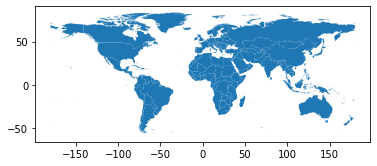

In [2]:
map_df.plot()

In [9]:
df =pd.read_excel('Attendees/2021 Virtual.xlsx')
df.head()

,organisation,countrycode,country,participant_group,Unnamed: 4,name,number of attendants
0,Brusov State University,AM,Armenia,Non-Member,NaN,Abyei,NaN
1,The University of Melbourne,AU,Australia,Member,NaN,Afghanistan,NaN
2,University of Melbourne,AU,Australia,Member,NaN,Aksai Chin,NaN
3,University of Melbourne,AU,Australia,Early-Career Member,NaN,Albania,NaN
4,University of Bielefeld,AU,Australia,Early-Career Non-Member,NaN,Algeria,NaN


In [10]:
df_merged = pd.merge(map_df,df)
df_merged.head()

,french_short,status,name,color_code,continent,iso3,iso_3166_1_alpha_2_codes,region,geometry,organisation,countrycode,country,participant_group,Unnamed: 4,number of attendants
0,South Georgia & the South Sandwich Islands,UK Territory,South Georgia & the South Sandwich Islands,GBR,Antarctica,None,None,None,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889...",University of Lodz,PL,Poland,Member,NaN,NaN
1,Mongolie,Member State,Mongolia,MNG,Asia,MNG,MN,Eastern Asia,"POLYGON ((116.71138 49.83047, 116.64665 49.738...",Maynooth University,IE,Ireland,Member,NaN,NaN
2,Espagne,Member State,Spain,ESP,Europe,ESP,ES,Southern Europe,"MULTIPOLYGON (((-17.91125 27.77375, -17.96389 ...",Warsaw University of Technology,PL,Poland,Member,NaN,20.0
3,Chypre,Member State,Cyprus,CYP,Asia,CYP,CY,Western Asia,"POLYGON ((34.12000 35.40083, 33.95805 35.31277...",Charles University,CZ,Czech Republic,PhD Researcher Non-Member,NaN,NaN
4,Macao,CN Special Administrative Region,Macao,CHN,Asia,MAC,MO,Eastern Asia,"MULTIPOLYGON (((113.55143 22.16339, 113.55424 ...",University of Public Service,HU,Hungary,Non-Member,NaN,NaN


In [11]:
df_merged['number of attendants'] = df_merged['number of attendants'].fillna(0)

Text(0.5, 1.0, 'Number Of Attendants Virtually, 2021')

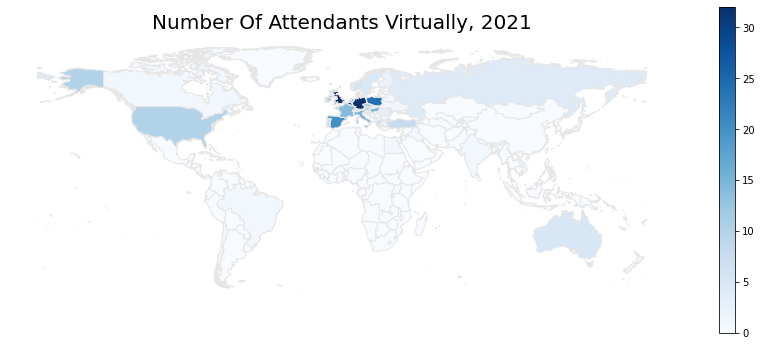

In [12]:
import matplotlib as mpl
fig, ax = plt.subplots(1, figsize=(15,6))
vmax = df_merged[df_merged["number of attendants"] <35]["number of attendants"].max()
vmin = df_merged["number of attendants"].min()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
df_merged.plot(column='number of attendants', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True, norm=norm)
ax.axis('off')
ax.set_title('Number Of Attendants Virtually, 2021', fontdict={'fontsize': '20', 'fontweight' : '3'})

In [13]:
fig.savefig('Virtual 2021.jpg')